# **KELOMPOK 5**

# **STAGE 1**

1. Descriptive Statistics <br>
Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil 
observasinya, seperti:<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya 
kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq) <br>
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
 misal untuk A: “Semua tipe data sudah sesuai”


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/Training Data.csv')

In [ ]:
df.duplicated().value_counts()

False    252000
dtype: int64

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Terdapat 13 varibel dan 252000 baris data untuk tiap variabel. Semua tipe data sudah benar.

In [ ]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Tidak terdapat nilai kosong di 13 variabel tersebut

In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Untuk nilai summary di setiap kolom masih tidak ada masalah. Bisa dilihat bahwa untuk setiap kolom perbedaan antara mean dan median tidak begitu jauh.

In [ ]:
cats = ['Married/Single', 'Car_Ownership', 'House_Ownership', 'Profession', 'CITY', 'STATE']
nums = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'] 

In [ ]:
df[cats].describe()

,Married/Single,Car_Ownership,House_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,2,3,51,317,29
top,single,no,rented,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,176000,231898,5957,1259,28400


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Married/Single:
single     226272
married     25728
Name: Married/Single, dtype: int64

Value count kolom Car_Ownership:
no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Value count kolom House_Ownership:
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Value count kolom Profession:
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              51

Di kolom **City** dan **State** terdapat banyak kota yang ada nomor disebelahnya. Nantinya data tersebut perlu dibersihkan agar mempermudah proses pemodelan

2. Univariate Analysisis <br>
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun 
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya 
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya 
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

DATA NUMERIK

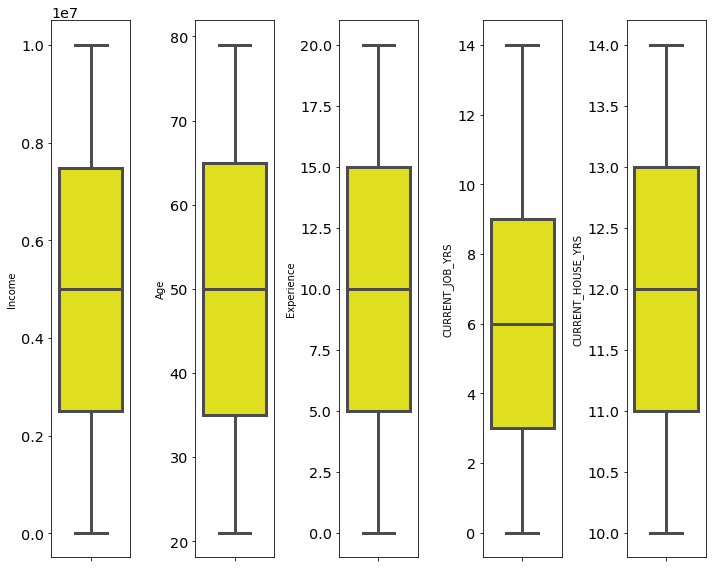

In [ ]:
plt.figure(figsize=(10,8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='yellow', orient='v')
    plt.tight_layout()

Dari distribusi boxplot diatas untuk tipe data yang numerik bisa dilihat bahwa tidak terdapat outlier sama sekali di masing-masing kolom.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

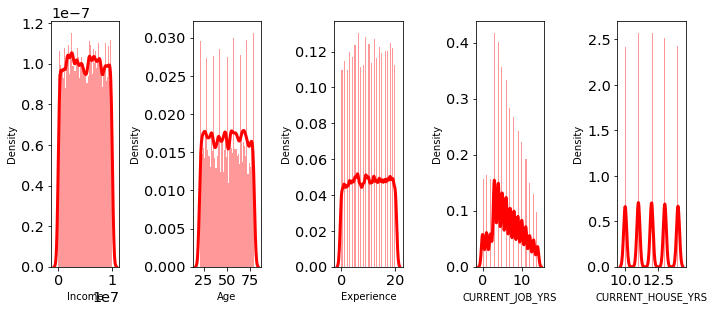

In [ ]:
plt.figure(figsize=(10,8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='red')
    plt.tight_layout()

Dari distribution plot diatas bisa dilihat bahwa untuk variabel 'Income', 'Age' dan 'Experience' distribusinya uniform, sehingga akan dilakukan transformasi agar distribusinya menjadi normal. Sedangkan untuk 'CURRENT_JOB_YRS' distribusinya skew ke kanan, dimana nilai mean lebih besar daripada nilai median. Terakhir untuk distribusi 'CURRENT_HOUSE_YRS' distribusinya merupakan multimodal dimana memiliki beberapa puncak.

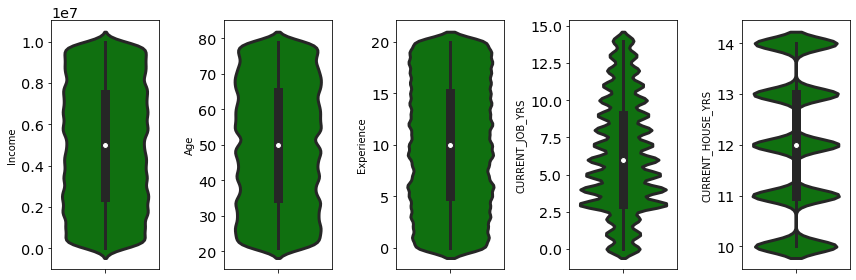

In [ ]:
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.violinplot(y = df[nums[i]], color = 'green')
  plt.tight_layout()

DATA KATEGORIK

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


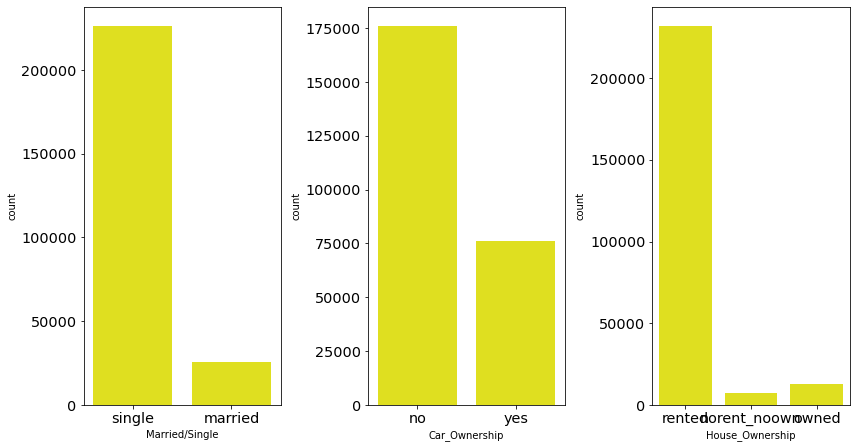

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0, len(cats[:3])):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[:3][i]], color='yellow', orient='h')
    plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


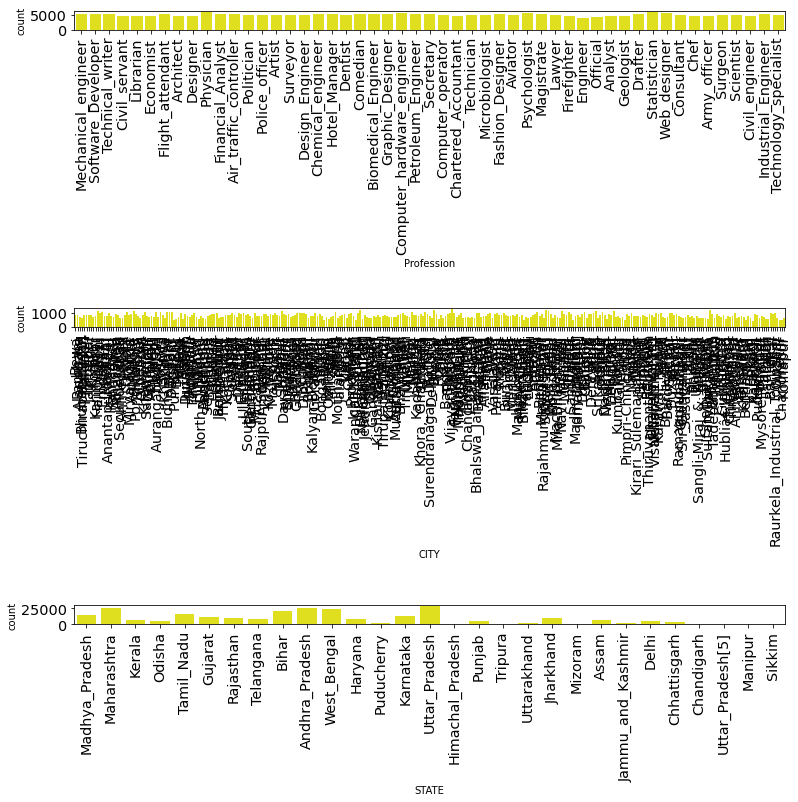

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0, len(cats[3:])):
    plt.subplot(3, 1, i+1)
    sns.countplot(df[cats[3:][i]], color='yellow', orient='h')
    plt.xticks(rotation=90)
    plt.tight_layout(pad=4)

Untuk data kategorik, dapat dilihat untuk kolom 'Married/Single' didominasi oleh value 'single', kolom 'Car_Ownership' didominasi oleh value 'no', dan kolom 'House_Ownership' didominasi oleh value 'rented'. Ketiga kolom tersebut nantinya akan dilakukan encoding untuk mengubah valuenya menjadi numerik.

Untuk kolom 'Profession','CITY', dan 'STATE', memiliki banyak unique value, sehingga untuk data tersebut akan dilihat apakah kolom tersebut berpengaruh terhadap target atau tidak. Jika tidak akan didrop, jika iya maka akan dilakukan encoding atau dilakukan pengerucutan dulu lalu encoding.

In [ ]:
df.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


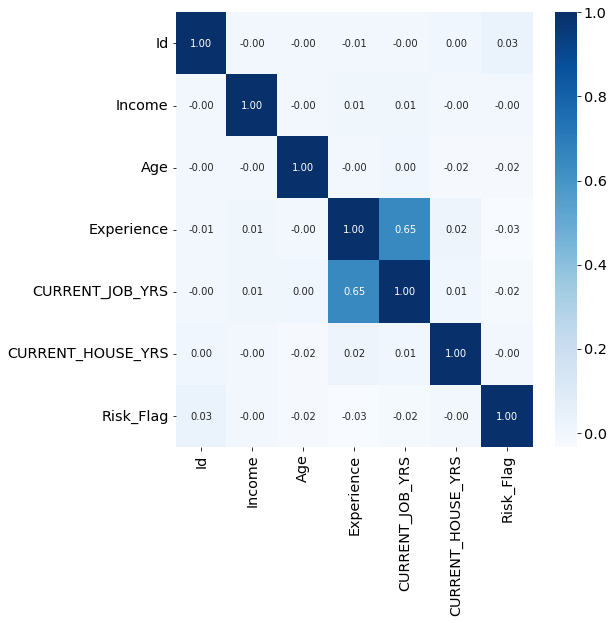

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

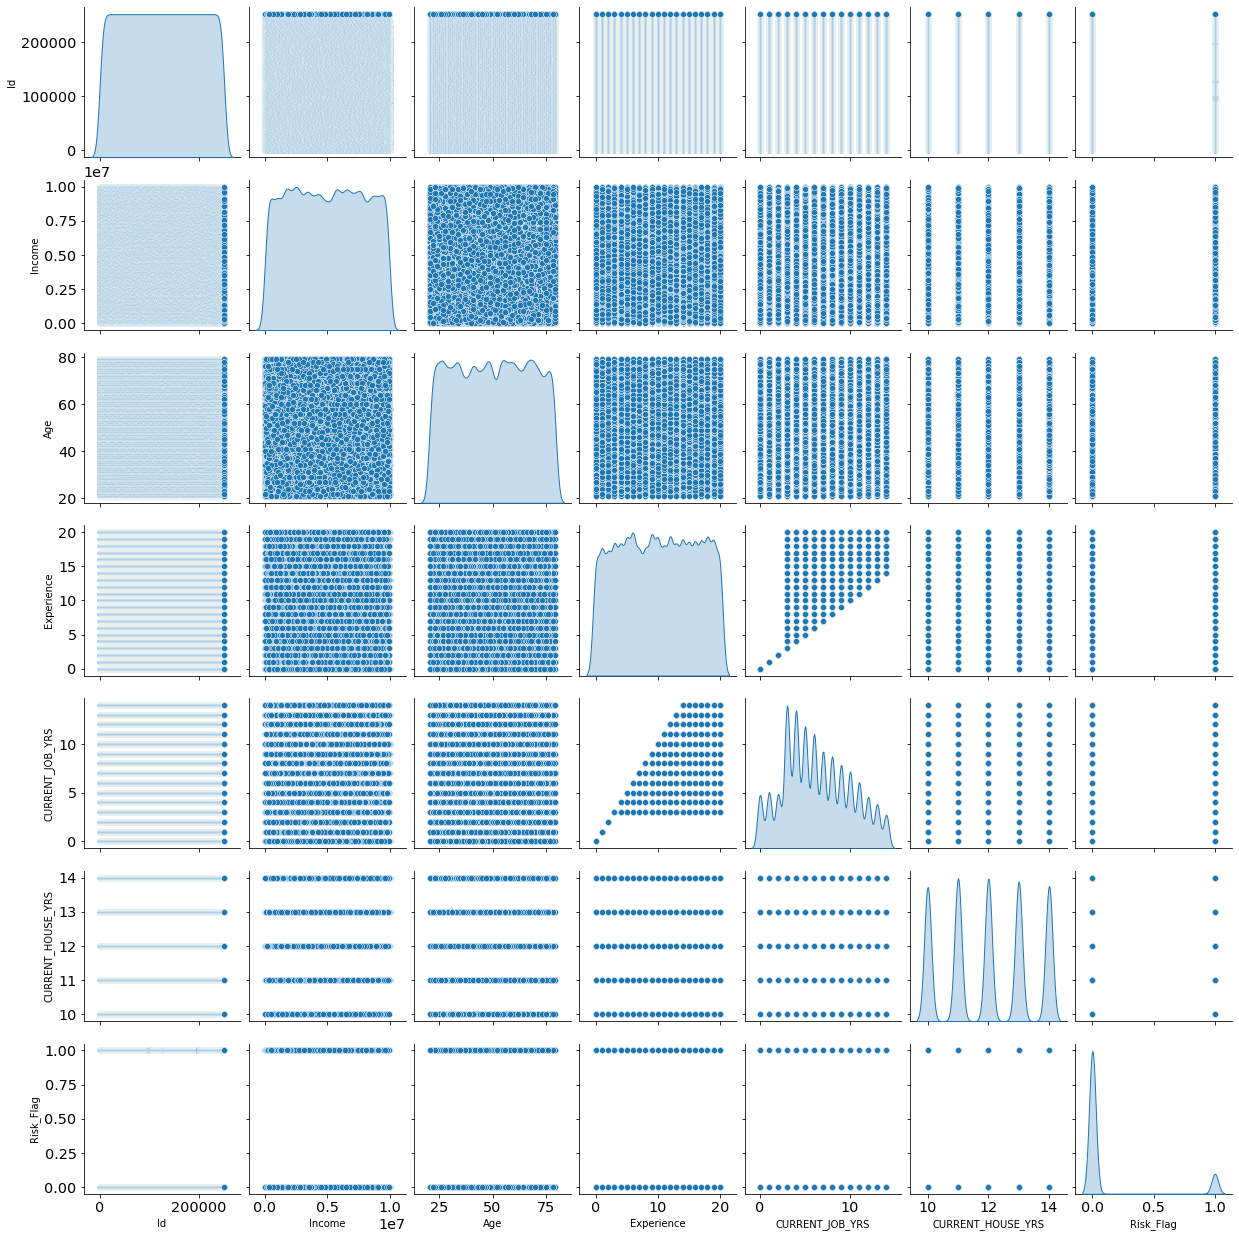

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')


**4. Business Insight <br>**
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu 
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan 
rekomendasinya untuk bisnis.


In [ ]:
defaulted = df.Risk_Flag.sum()
total = len(df.Risk_Flag)
rate_of_default = defaulted / total
print(f"The rate of 'defaulted-on-loan' is {rate_of_default * 100 }% and total number of defaulter are", defaulted)

The rate of 'defaulted-on-loan' is 12.3% and total number of defaulter are 30996


TOTAL USER (PAID AND DEFAULTED)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


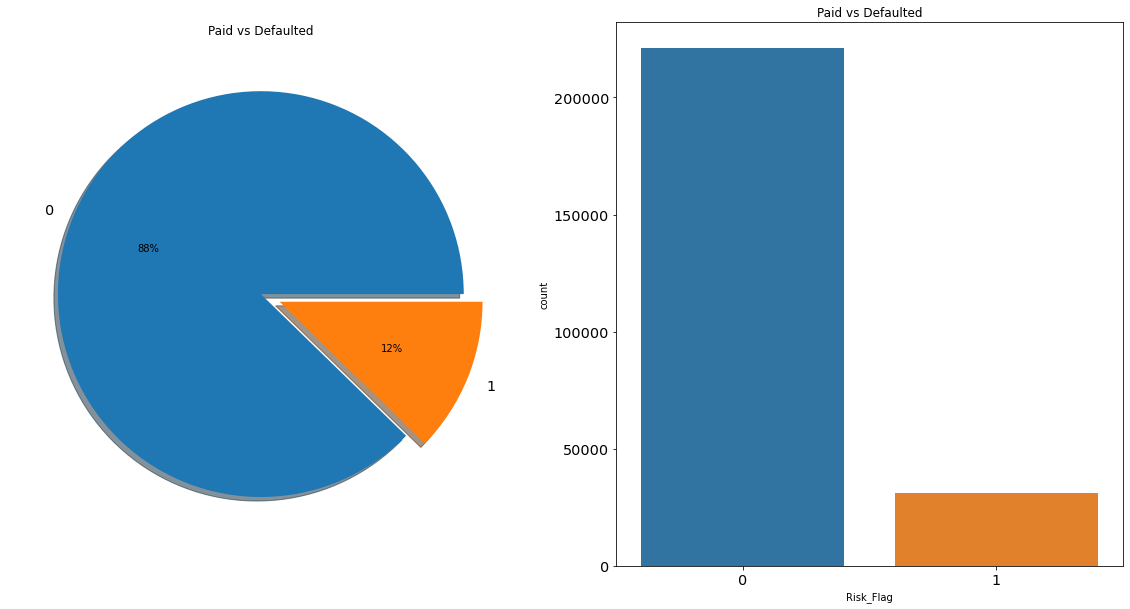

In [ ]:
f, ax = plt.subplots(1,2, figsize=(20,10))
df.Risk_Flag.value_counts().plot.pie(explode=[0,0.1], autopct= "%1.f%%", shadow = True, ax=ax[0])
ax[0].set_title("Paid vs Defaulted")
ax[0].set_ylabel("")
sns.countplot("Risk_Flag", data=df, ax=ax[1])
ax[1].set_title("Paid vs Defaulted")
plt.show()

PERSENTASE PINJAMAN YANG BERHASIL TERBAYAR TIAP STATE

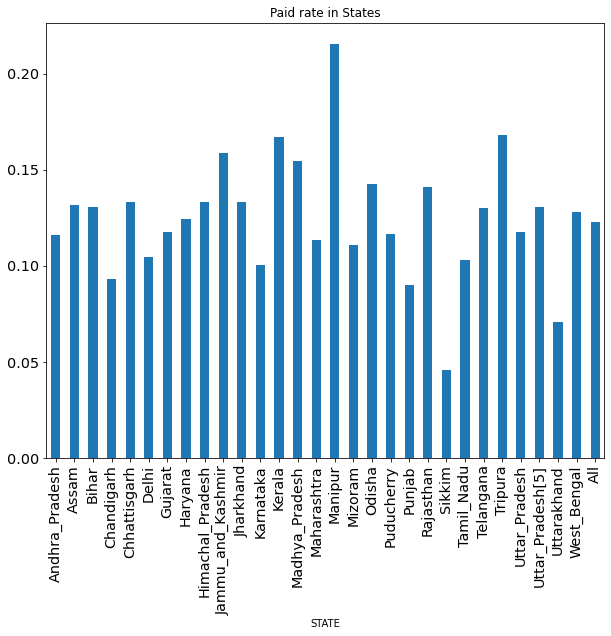

In [ ]:
(pd.crosstab(df.STATE, df.Risk_Flag, margins=True)[1] / pd.crosstab(df.STATE, df.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Paid rate in States")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

PERSENTASE PINJAMAN YANG BERHASIL TERBAYAR TIAP PROFESI

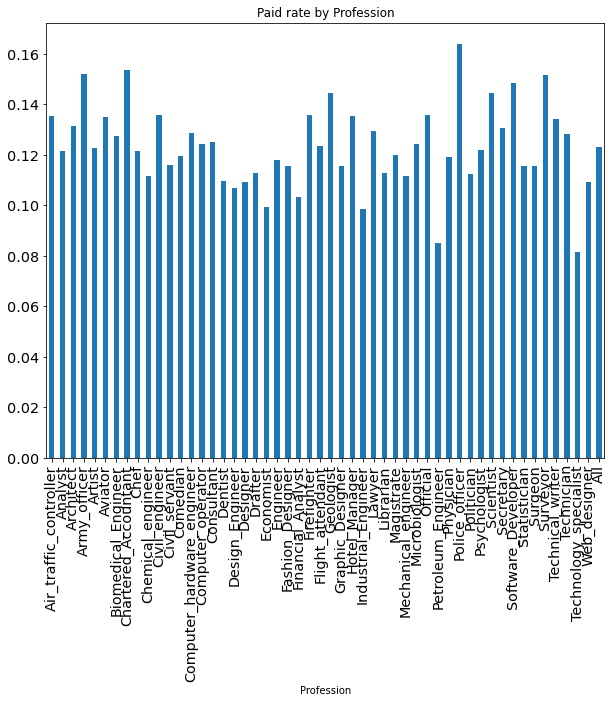

In [ ]:
(pd.crosstab(df.Profession, df.Risk_Flag, margins=True)[1] / pd.crosstab(df.Profession, df.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Paid rate by Profession")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

PRESENTASE PINJAMAN YANG BERHASIL DIBAYAR BERDASARKAN HOUSE OWNERSHIP

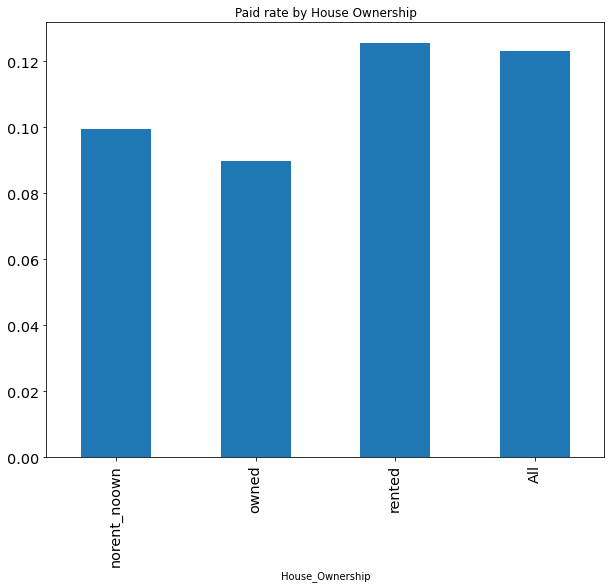

In [ ]:
(pd.crosstab(df['House_Ownership'], df.Risk_Flag, margins=True)[1] / pd.crosstab(df['House_Ownership'], df.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Paid rate by House Ownership")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

PRESENTASE PINJAMAN YANG BERHASIL DIBAYAR BERDASARKAN CAR OWNERSHIP

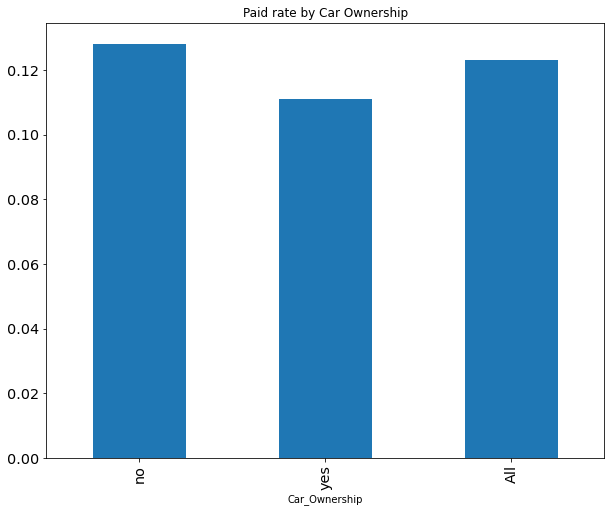

In [ ]:
(pd.crosstab(df['Car_Ownership'], df.Risk_Flag, margins=True)[1] / pd.crosstab(df['Car_Ownership'], df.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Paid rate by Car Ownership")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

PRESENTASE PINJAMAN YANG BERHASIL DIBAYAR BERDASARKAN MARITAL STATUS

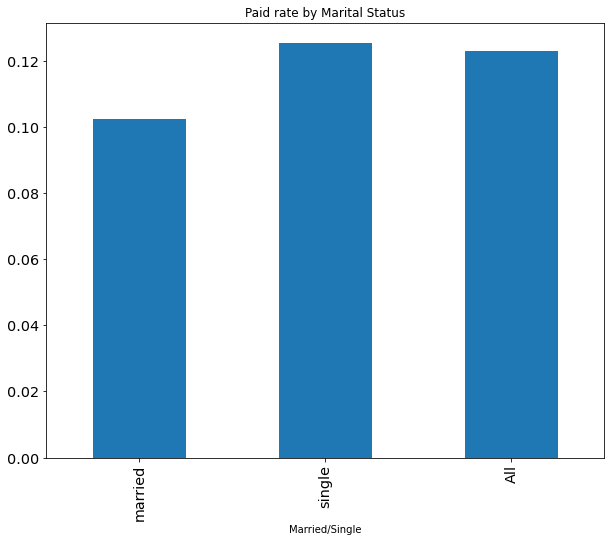

In [ ]:
(pd.crosstab(df['Married/Single'], df.Risk_Flag, margins=True)[1] / pd.crosstab(df['Married/Single'], df.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Paid rate by Marital Status")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

HUBUNGAN INCOME DENGAN RISK FLAG

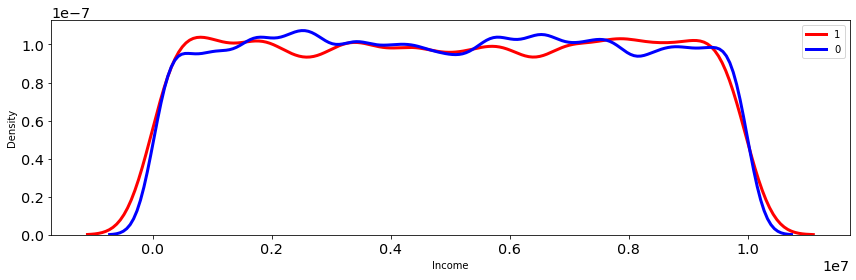

In [ ]:
sns.kdeplot(df[df['Risk_Flag']==1]['Income'],color='red',label='1')
sns.kdeplot(df[df['Risk_Flag']==0]['Income'],color='blue',label='0')
plt.legend()
plt.tight_layout()

HUBUNGAN HOUSE OWNERSHIP DAN RISK FLAG

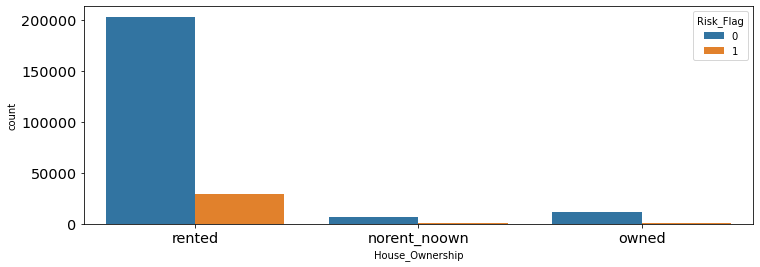

In [ ]:
sns.countplot(data = df, x= 'House_Ownership', hue='Risk_Flag')

HUBUNGAN CAR OWNERSHIP DAN RISK FLAG

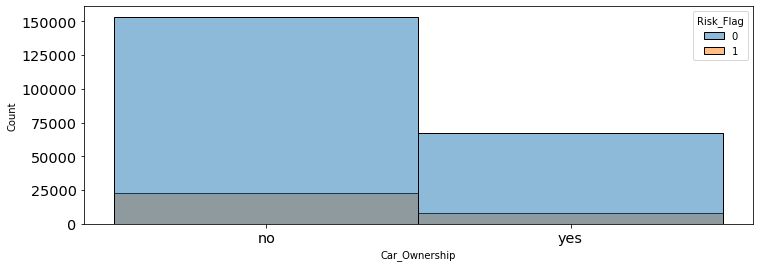

In [ ]:
sns.histplot(data=df, x='Car_Ownership', hue='Risk_Flag')

HUBUNGAN AGE DAN RISK FLAG

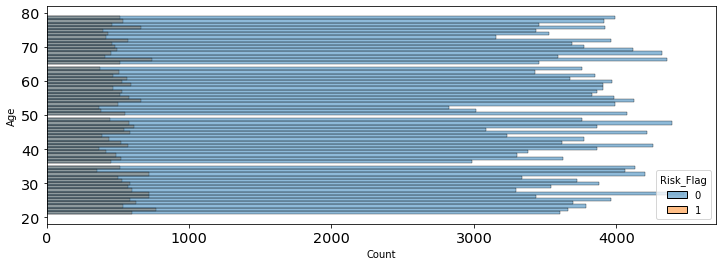

In [ ]:
sns.histplot(data=df, y='Age', hue='Risk_Flag')

HUBUNGAN CURRENT JOB YEARS DAN RISK FLAG

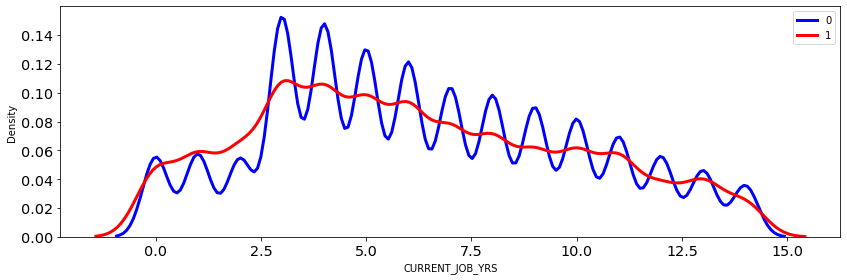

In [ ]:
sns.kdeplot(df[df['Risk_Flag']==0]['CURRENT_JOB_YRS'],color='blue',label='0')
sns.kdeplot(df[df['Risk_Flag']==1]['CURRENT_JOB_YRS'],color='red',label='1')
# plt.axvline(x=np.median(df_single_0['Income']), ls=':',color='blue')
# plt.axvline(x=np.median(df_single_1['Income']), ls=':',color='red')
plt.legend()
plt.tight_layout()

HUBUNGAN PROFESI DAN RISK FLAG

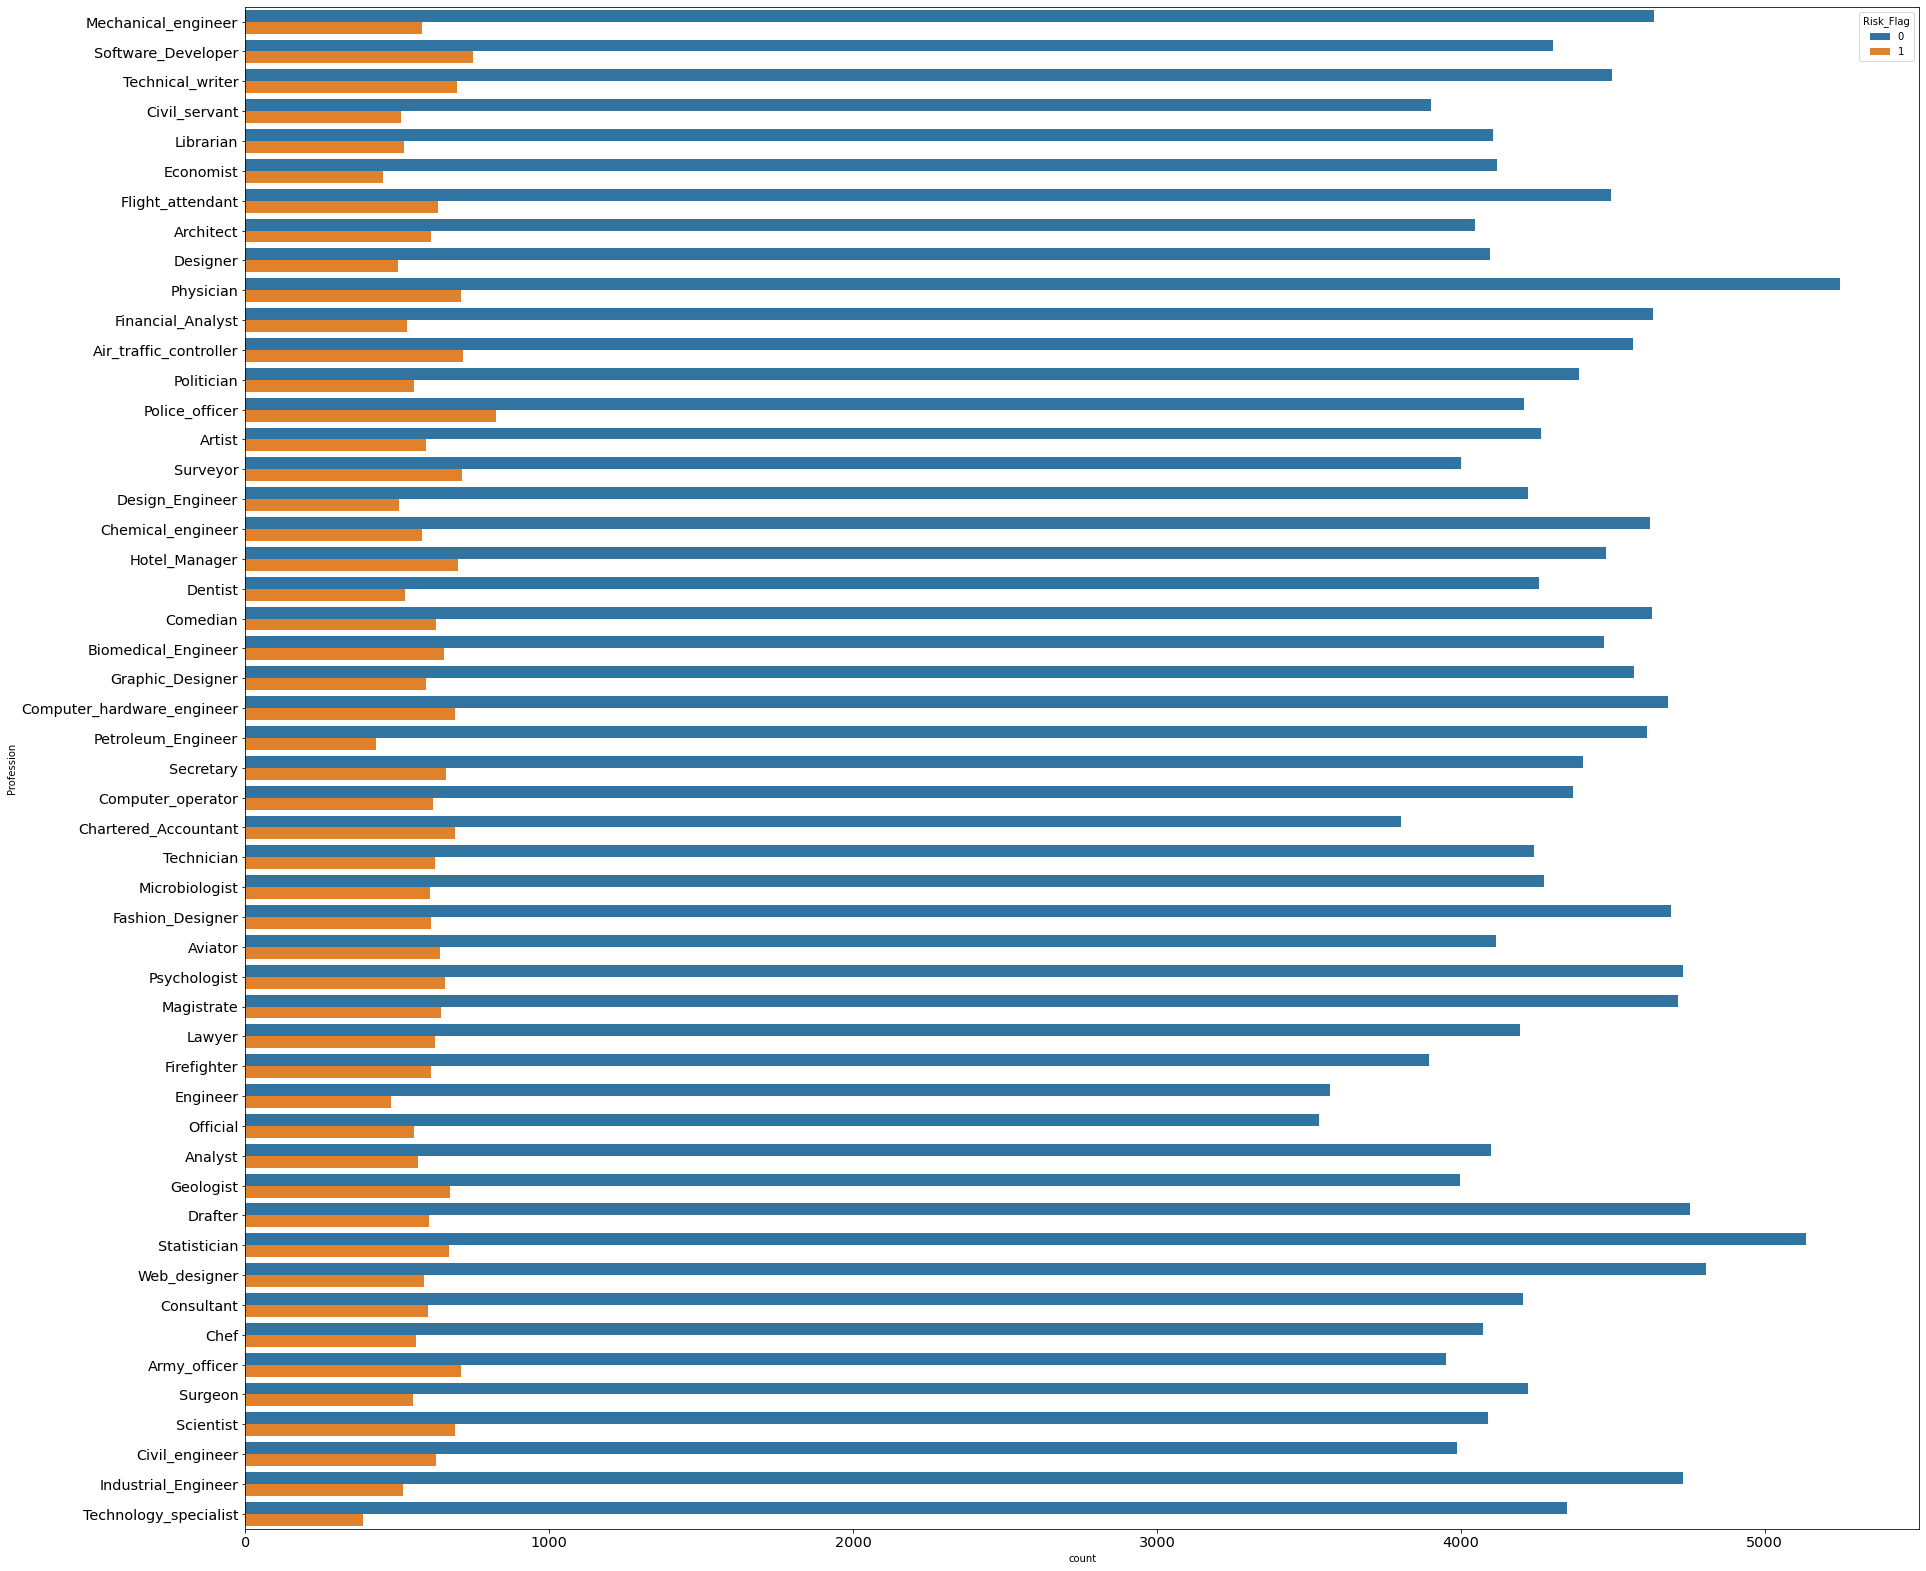

In [ ]:
plt.figure(figsize=(30,28))
sns.countplot(data= df, y= 'Profession', hue='Risk_Flag')

In [ ]:
married_default_rate = 2636 / 25728 
single_default_rate = 28360 / 226272
print(f"default-on-loan for married is {round(married_default_rate * 100)} %\n"
      f"default-on-loan for single is {round(single_default_rate * 100)}%")

default-on-loan for married is 10 %
default-on-loan for single is 13%


HUBUNGAN MARITAL STATUS DAN RISK FLAG

# **DARI GRAFIK DI ATAS DIDAPAT INSIGHT SEBAGAI BERIKUT**

---


- 88% DATA MERUPAKAN USER DENGAN RISK FLAG 0
- DATA DIDOMINASI OLEH USER DENGAN MARITAL STATUS SINGLE, NO CAR OWNERSHIP, RENTED HOUSE OWNERSHIP, DAN USER DENGAN CURRENT JOB YEARS 3-5
- PERSENTASE USER BERHASIL MEMBAYAR LOAN RELATIF KECIL UNTUK SEMUA DATA KATEGORIK (RATA RATA KURANG DARI 20%)
- DISTRIBUSI INCOME, AGE, DAN EXPERIENCE UNIFORM
- DISTRIBUSI DATA NUMERIK UNTUK DATA DENGAN RISK FLAG 0 DAN DATA DENGAN RISK FLAG 1 HAMPIR SAMA
- PERBANDINGAN DATA KATEGORIK DENGAN RISK FLAG 0 DAN DATA DENGAN RISK FLAG 1 HAMPIR SAMA


---



Dari data yang diperoleh cukup sulit untuk menentukan alasan user gagal melakukan pembayaran, karena sebagian besar distribusi datanya uniform. sehingga kami berhipotesa bahwa alasan user gagal melakukan pembayaran yaitu total loan nya. Untuk mengatasi permasalahan tersebut dan mengurangi default rate dan revenue loss, kami merekomendasikan untuk melakukan segmentasi customer, dimana customer akan dibagi ke dalam beberapa tier berdasarkan data customer, dan jumlah pinjamannya berdasarkan tier customernya.

# **STAGE 2**

---

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.3 MB/s eta 0:00:00


In [ ]:
imputer = KNNImputer(n_neighbors = 5)

# Numerical Data
nums = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
scaler = StandardScaler()
power = PowerTransformer(method = 'yeo-johnson')
numeric_pipe = Pipeline ([('imputer', imputer),
                          ('scaler', scaler),
                          ('power', power)])

In [ ]:
# Categorical Data (Binary)
cats_binary = ['Profession', 'CITY', 'STATE']
binary_encoder = ce.BinaryEncoder()
binary_pipe = Pipeline([
    ('binary_encoder', binary_encoder)
])

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric_pipe', numeric_pipe, nums),
    ('binary_pipe', binary_pipe, cats_binary)
])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

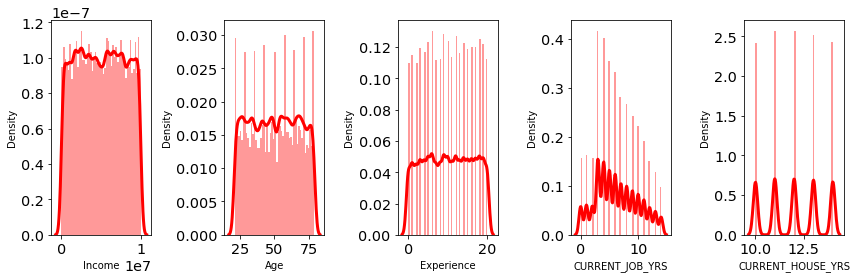

In [ ]:
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.distplot(df[nums[i]], color ='red')
  plt.tight_layout()

NameError: ignored

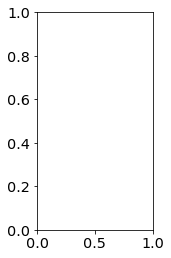

In [ ]:
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.distplot(df_copy[nums[i]], color ='red')
  plt.tight_layout()

In [ ]:
nums = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.distplot(df_copy[nums[i]], color ='red')
  plt.tight_layout()

# **TANPA PIPELINE**

# DATA CLEANSING

##A. Handle Missing Values







In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Tidak ada missing value

### HAPUS STRING CHARACTER DARI KOLOM CITY

In [ ]:
df_copy['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [ ]:
df_copy['CITY'] = df_copy['CITY'].map(lambda x:x.rstrip('[]1234567890'))

In [ ]:
df_copy['CITY'].value_counts()

Aurangabad       1543
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa          1180
                 ... 
Ujjain            486
Warangal          459
Bettiah           457
Katni             448
Karaikudi         431
Name: CITY, Length: 316, dtype: int64

##B. Handle Duplicated Data <br>





In [ ]:
df_copy.duplicated().any()

False

Tidak ada duplicated data

## C. Handle Outliers




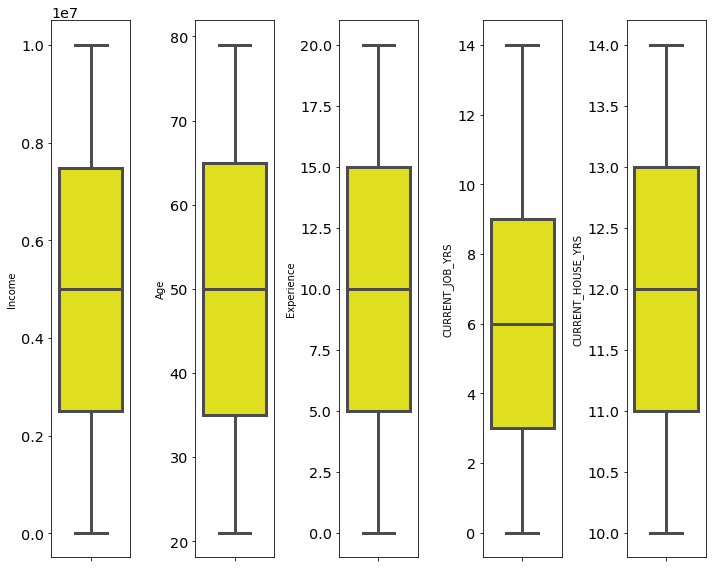

In [ ]:
plt.figure(figsize=(10,8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_copy[nums[i]], color='yellow', orient='v')
    plt.tight_layout()

Tidak ada outlier

## D. Feature Transform

####Distribusi data numerik sebelum transformasi

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

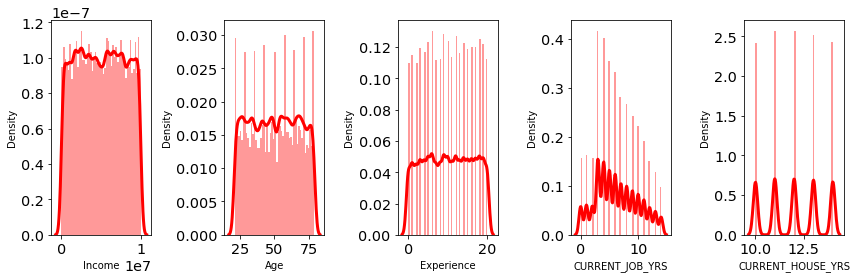

In [ ]:
nums = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.distplot(df_copy[nums[i]], color ='red')
  plt.tight_layout()

Karena dsitribusi data merupakan uniform dan multimodal, maka data tidak akan ditransformasi, karena tidak akan terjadi perubahan (mendekati normal)

## E. Feature Encoding

In [ ]:
# label encoding Married/Single
MappingStatus = {
    'single' : 0,
    'married' : 1
}

# label encoding House_Ownership
MappingHouse = {
    'rented' : 1,
    'norent_noown' : 0,
    'owned' : 2
}

# label encoding Car_Ownership
MappingCar = {
    'no' : 0,
    'yes' : 1
}

df_copy['Married/Single'] = df_copy['Married/Single'].map(MappingStatus)
df_copy['House_Ownership'] = df_copy['House_Ownership'].map(MappingHouse)
df_copy['Car_Ownership'] = df_copy['Car_Ownership'].map(MappingCar)

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# binary encoding pada fitur state dan profession
import category_encoders as ce

encoder_state = ce.BinaryEncoder(cols=['STATE'],return_df=True)
encoder_profession = ce.BinaryEncoder(cols=['Profession'],return_df=True)

In [ ]:
df_encoder = encoder_state.fit_transform(df_copy)
df_new = encoder_profession.fit_transform(df_encoder)
df_new.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession_0,Profession_1,Profession_2,...,Profession_5,CITY,STATE_0,STATE_1,STATE_2,STATE_3,STATE_4,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,1,0,0,0,0,...,1,Rewa,0,0,0,0,1,3,13,0
1,2,7574516,40,10,0,1,0,0,0,0,...,0,Parbhani,0,0,0,1,0,9,13,0
2,3,3991815,66,4,1,1,0,0,0,0,...,1,Alappuzha,0,0,0,1,1,4,10,0
3,4,6256451,41,2,0,1,1,0,0,0,...,0,Bhubaneswar,0,0,1,0,0,2,12,1
4,5,5768871,47,11,0,1,0,0,0,0,...,0,Tiruchirappalli,0,0,1,0,1,3,14,1


## F. Data Splitting

In [ ]:
# drop fitur
drop_fitur = ['Id','CITY']

In [ ]:
X = df_new.drop(drop_fitur,axis=1)
y = df_new['Risk_Flag']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

## G. Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## H. Handle Class Imbalance

Akan dilakukan dengan menggunakan parameter class_weight = 'balance' saat melakukan modelling

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


# FEATURE ENGINEERING

## A. FEATURE SELECTION

1. Drop kolom Id
2. Drop kolom CITY karena jumlah unique value yang terlalu banyak, dan akan menggunakan fitur STATE saja

In [ ]:
selector = SelectKBest(chi2, k=7)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print("Selected features:", selected_feature_names)

Selected features: Index(['Income', 'Age', 'Experience', 'Married/Single', 'Car_Ownership',
       'CURRENT_JOB_YRS', 'Risk_Flag'],
      dtype='object')


## B. FEATURE EXTRACTION

Tidak ada fitur baru yang dibuat, tetapi ada pecahan dari beberapa fitur kategorikal setelah dilakukan encoding

## C. FEATURE TAMBAHAN

Fitur yang mungkin perlu ditambahkan :
1. Total amount of loan.
2. Uda berapa kali loan di tempat ini (payment/loan history).
3. Pengeluaran Bulanan.
4. Banyaknya pengajuan pinjaman setiap bulannya.
5. customer credit score
6. the length of time of the customer has been employed.

